# Spotify

Données disponibles directement [ici](spotify_dataset.csv)

On va créer deux `DataFrames` :

| `DataFrame` | Contenu |
|:-|:-|
| `spotify`    | données d'origine |
| `spotify_qt` | avec uniquement les variables d'intérêt |
|              | et standardisé pour l'application des méthodes |

Comme il n'y a pas de données manquantes, on utilisera `spotify` pour calculer les centres des classes lorsqu'on voudra les décrire.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
spotify = pandas.read_csv("https://fxjollois.github.io/donnees/spotify_dataset.csv")
spotify

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,10s
41095,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,10s
41096,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,10s
41097,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,10s


In [3]:
spotify_qt = spotify[["danceability", "energy", "loudness", "speechiness", 
                      "acousticness", "instrumentalness", "liveness", "valence", 
                      "tempo", "duration_ms", "chorus_hit"]]
spotify_qt = pandas.DataFrame(scale(spotify_qt), columns = spotify_qt.columns)
spotify_qt

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
0,-0.689981,0.160142,0.469661,-0.379213,0.371103,-0.508718,-0.714836,1.131746,2.279088,-0.515621,-0.376564
1,-0.234429,-0.295077,-0.424305,-0.455863,-1.021622,-0.156181,-0.147635,0.952193,-0.602615,-0.178724,0.458697
2,0.659804,0.274936,-0.596960,-0.405925,1.421549,-0.508703,-0.477201,1.367410,-0.116718,-0.091752,-0.151541
3,0.282989,-0.136740,-0.345791,0.360579,1.008452,-0.427667,-0.812549,1.588111,-0.472335,-0.646968,-0.807728
4,-0.138819,0.734114,1.262708,0.592853,1.454007,-0.505845,0.066294,1.359929,-0.162184,0.090146,-0.963259
...,...,...,...,...,...,...,...,...,...,...,...
41094,-2.067887,-0.876966,-0.792398,-0.450057,1.539577,2.673999,0.650262,-1.894103,-1.617400,-0.706227,-0.831225
41095,2.082702,-0.845298,0.050356,0.245604,-0.780846,-0.508718,0.343823,0.738973,0.022291,-0.696619,-0.398198
41096,1.008498,0.888492,1.061998,-0.434959,-1.035785,-0.508708,-0.361564,0.233979,0.022772,-0.059810,-1.019295
41097,0.339230,-1.593441,-1.101181,-0.195717,1.843498,2.351114,-0.303745,0.065648,0.023838,-0.180624,-0.970927


In [4]:
spotify_qt.describe().round(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
count,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.04,-2.29,-7.35,-0.85,-1.07,-0.51,-1.09,-2.03,-4.10,-1.85,-2.11
25%,-0.67,-0.73,-0.49,-0.46,-0.96,-0.51,-0.62,-0.79,-0.75,-0.52,-0.66
50%,0.07,0.08,0.18,-0.34,-0.31,-0.51,-0.40,0.06,-0.06,-0.14,-0.22
75%,0.73,0.82,0.72,-0.04,0.92,-0.31,0.34,0.84,0.59,0.27,0.40
max,2.52,1.66,2.63,10.30,1.86,2.79,4.61,1.70,4.20,33.08,20.68


## Pour information

L'application de la CAH sur les 41000 lignes prend un peu plus d'une minute.

In [5]:
%%time
hac_complet = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(spotify_qt)

CPU times: user 1min 11s, sys: 5.96 s, total: 1min 17s
Wall time: 1min 18s


## Kmeans avec $k=100$

In [6]:
kmeans_100 = KMeans(n_clusters = 100).fit(spotify_qt)

In [7]:
kmeans_1 = KMeans(n_clusters = 1).fit(spotify_qt)

Avec la première partition en 100 classes, nous conservons 74% de l'information.

In [8]:
numpy.round(1 - kmeans_100.inertia_ / kmeans_1.inertia_, 4)

0.7427

Ici, nous avons besoin des centres sur les données standardisées pour faire la CAH ensuite.

In [9]:
centres = spotify_qt.assign(classe = kmeans_100.labels_).groupby("classe").mean()
centres

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
classe,,,,,,,,,,,
0,0.576197,0.053123,0.429252,-0.263344,-0.643246,-0.456779,-0.348188,-0.772619,-0.026341,0.231609,1.210824
1,-0.613849,1.117922,0.828264,-0.073101,-0.926024,-0.411744,-0.338511,-0.227054,-0.728477,-0.087406,-0.328043
2,0.685916,0.325095,-0.053744,-0.203769,-0.611888,2.061115,-0.361121,0.279874,-0.148739,0.191318,1.880755
3,-0.566618,-0.353615,0.074981,-0.416278,-0.558810,-0.428862,-0.372448,-1.067843,0.799049,0.346755,-0.236677
4,-1.540424,-2.143614,-4.007273,-0.286562,1.630649,2.368786,-0.493106,-1.545289,-0.919001,-0.425449,-0.118326
...,...,...,...,...,...,...,...,...,...,...,...
95,-1.121939,1.493745,0.958178,0.944328,-1.009438,-0.291706,0.211046,-1.285188,0.065420,-0.041557,-0.281952
96,0.043709,-0.471047,-0.738532,8.100578,1.203198,0.139447,0.823455,-0.300600,-0.683440,7.841744,-0.229803
97,0.984172,0.468918,0.639093,2.530423,-0.528639,-0.460768,-0.065283,0.223788,-0.579885,0.085825,2.062431


In [10]:
corresp01 = pandas.DataFrame({"step0" : spotify_qt.index, "step1" : kmeans_100.labels_})
corresp01

,step0,step1
0,0,5
1,1,99
2,2,17
3,3,17
4,4,58
...,...,...
41094,41094,28
41095,41095,90
41096,41096,78
41097,41097,43


## CAH sur les centres

In [11]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(centres)

In [12]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Une classe a l'air particulière. Sur cette base et en regardant les autres, on peut envisager envisager 5 classes.

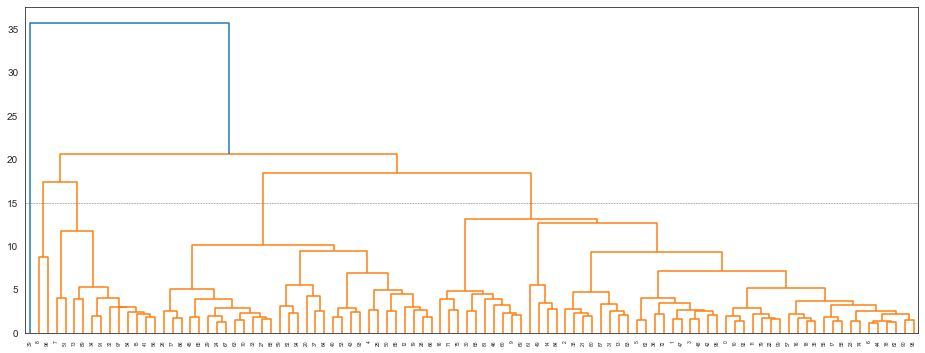

In [13]:
plt.figure(figsize = (16, 6))
plot_dendrogram(hac)
plt.axhline(y = 15, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

In [14]:
hac5 = AgglomerativeClustering(n_clusters = 5).fit(centres)

In [15]:
hac5.labels_

array([0, 0, 0, 0, 1, 0, 0, 2, 4, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 3, 1, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 2, 0, 2, 0, 1, 1, 0, 4, 2, 0, 0])

In [16]:
corresp12 = pandas.DataFrame({"step1" : centres.index, "step2" : hac5.labels_})
corresp12

,step1,step2
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
95,95,0
96,96,4
97,97,2
98,98,0


In [17]:
corresp02 = corresp01.merge(corresp12)
corresp02

,step0,step1,step2
0,0,5,0
1,353,5,0
2,585,5,0
3,592,5,0
4,686,5,0
...,...,...,...
41094,40998,10,0
41095,41019,10,0
41096,41024,10,0
41097,41034,10,0


Ici aussi, on calcule les centres sur les données standardisées.

In [18]:
centres_init = spotify_qt.assign(classe = corresp02.step2).groupby("classe").mean()
centres_init

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
classe,,,,,,,,,,,
0,0.016910,0.038605,0.036236,0.018455,-0.048792,0.001233,-0.007267,-0.016699,0.009713,0.022158,-0.000499
1,-0.063778,-0.146012,-0.148907,-0.074114,0.178917,-0.007291,0.019683,0.084074,-0.037804,-0.064546,-0.007850
2,0.113240,0.262579,0.291546,0.142085,-0.312193,0.022670,-0.017842,-0.200707,0.065935,0.077887,0.036472
3,0.748182,0.858521,1.034724,0.247760,-0.808588,-0.176992,-0.380561,0.115827,0.272233,-0.121452,0.442297
4,0.172381,0.382693,0.489883,0.244481,-0.378489,-0.080129,-0.020139,-0.215956,0.243016,0.012382,-0.011638


## Kmeans avec donc 5 classes

In [19]:
kmeans_5 = KMeans(n_clusters = 5, init = centres_init, n_init = 1).fit(spotify_qt)

On ne garde ici au final un peu moins 35% de l'information, avec 5 classes. Ce qui est tout de même assez élevé dans un cas réel.

In [20]:
numpy.round(1 - kmeans_5.inertia_ / kmeans_1.inertia_, 4)

0.3364

Pour décrire les classes, on utilise ici les données de départ.

In [21]:
spotify.assign(classe = kmeans_5.labels_).groupby("classe").mean().round(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
classe,,,,,,,,,,,,,,,,
0,0.49,0.35,5.16,-12.62,0.76,0.06,0.67,0.03,0.19,0.45,111.95,211319.54,3.80,39.34,9.81,0.47
1,0.33,0.18,5.00,-20.53,0.62,0.05,0.85,0.71,0.15,0.21,104.47,289909.29,3.71,41.34,12.89,0.02
2,0.49,0.69,5.22,-9.79,0.63,0.06,0.22,0.78,0.20,0.50,124.35,255855.55,3.90,43.79,10.68,0.13
3,0.68,0.68,5.26,-8.20,0.68,0.07,0.21,0.02,0.15,0.73,114.83,227564.77,3.98,38.87,10.23,0.72
4,0.46,0.78,5.28,-6.84,0.70,0.10,0.14,0.04,0.33,0.48,139.85,242428.07,3.92,41.10,10.56,0.50


## Kmeans avec 5 classes, mais en laissant l'initialisation par défaut

In [22]:
kmeans_5bis = KMeans(n_clusters = 5).fit(spotify_qt)

On remarque qu'en faisant ainsi, le résultat est (ici) un peu meilleur (35.5% d'inertie expliquée).

In [23]:
numpy.round(1 - kmeans_5bis.inertia_ / kmeans_1.inertia_, 4)

0.3552

In [24]:
spotify.assign(classe = kmeans_5bis.labels_).groupby("classe").mean().round(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
classe,,,,,,,,,,,,,,,,
0,0.67,0.68,5.24,-8.41,0.69,0.06,0.22,0.07,0.16,0.74,117.65,226416.23,3.97,38.62,10.19,0.69
1,0.43,0.80,5.27,-6.98,0.69,0.07,0.10,0.18,0.29,0.43,135.91,252151.36,3.91,42.90,10.70,0.40
2,0.35,0.22,5.02,-19.35,0.62,0.05,0.79,0.74,0.15,0.25,107.26,283086.41,3.74,41.53,12.55,0.03
3,0.49,0.35,5.15,-12.52,0.76,0.04,0.67,0.04,0.19,0.45,112.08,210788.15,3.80,39.12,9.82,0.47
4,0.68,0.63,5.48,-8.82,0.60,0.35,0.29,0.03,0.26,0.57,117.64,234864.75,3.94,40.56,10.39,0.60


## Comparaison des deux classes

In [25]:
pandas.crosstab(index = kmeans_5.labels_, columns = kmeans_5bis.labels_, 
                margins = True, margins_name = "Total",
                rownames = ["Hybride"], colnames = ["Direct"])

Direct,0,1,2,3,4,Total
Hybride,,,,,,
0,154,99,52,9301,279,9885
1,0,2,3591,75,15,3683
2,985,1799,644,145,42,3615
3,13772,306,0,25,1123,15226
4,764,6983,0,119,824,8690
Total,15675,9189,4287,9665,2283,41099


## Et si on cherchait le nombre de classes directement ?

In [26]:
%%time

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(spotify_qt)
    inertia = inertia + [kmeans.inertia_]
rsquare = [(inertia[0] - i) / inertia[0] for i in inertia]
criteres = pandas.DataFrame({
    "k": range(1, 11), 
    "inertia": inertia,
    "rsquare": rsquare,
    "pseudof": [(rsquare[k-1] / k) / ((1 - rsquare[k-1]) / (spotify_qt.shape[0] - k)) if k > 1 else None for k in range(1, 11)]
})

CPU times: user 1min 31s, sys: 9.65 s, total: 1min 41s
Wall time: 7.98 s


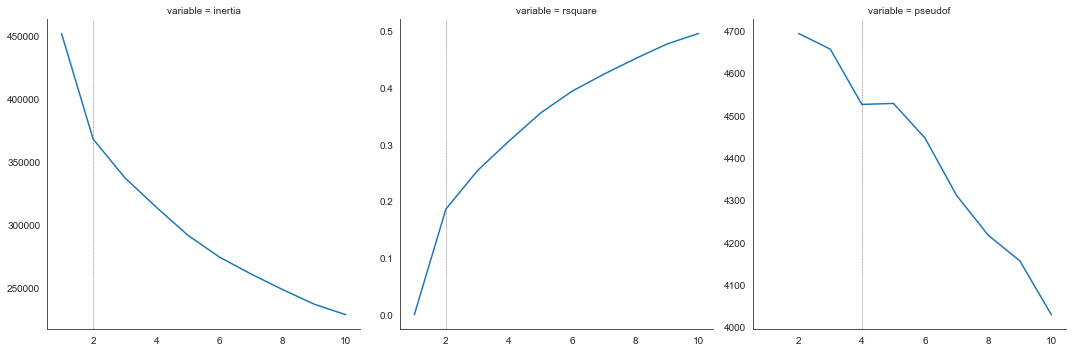

In [27]:
g = seaborn.FacetGrid(data = criteres.melt(id_vars = "k"), col = "variable", sharey = False, 
                      height = 5, aspect = 1)
g.map_dataframe(seaborn.lineplot, x = "k", y = "value")
ax1, ax2, ax3 = g.axes[0]
ax1.axvline(x = 2, linewidth = .5, color = "dimgray", linestyle = "--")
ax2.axvline(x = 2, linewidth = .5, color = "dimgray", linestyle = "--")
ax3.axvline(x = 4, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()